In [147]:
import pandas as pd
import pickle

from jupyterthemes import jtplot
jtplot.style(theme='monokai')

%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
infos = pickle.load(open('../../data/infos.p', 'rb'))

Text(0.5, 1.0, 'Rating (tmdb)')

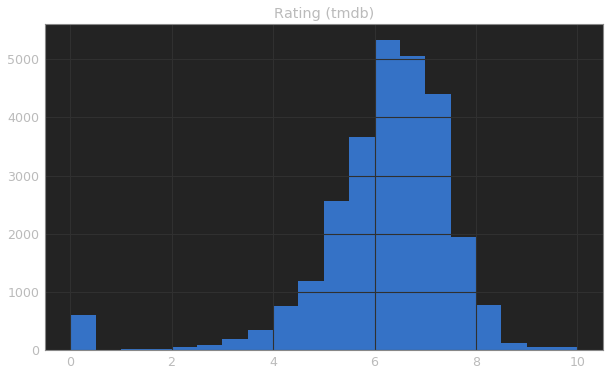

In [149]:
ax = pd.Series([i['vote_average'] for i in infos.values()]).hist(bins=20, figsize=(10, 6))
ax.set_title("Rating (tmdb)")

Text(0.5, 1.0, 'Popularity')

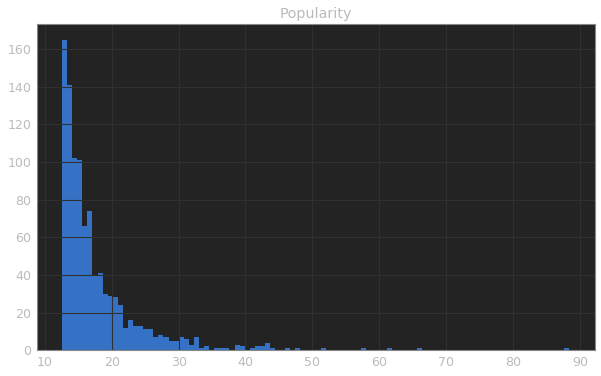

In [150]:
ax = pd.Series([i['popularity'] for i in infos.values()]).fillna(0) \
.sort_values().reset_index()[0][-1000:].hist(bins=100, figsize=(10, 6))
ax.set_title("Popularity")

In [151]:
infos[1]

{'adult': False,
 'collection': 10194,
 'genres': [16, 35, 10751],
 'original_language': 'en',
 'overview': "Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
 'popularity': 25.398,
 'production_companies': [3],
 'production_countries': ['us'],
 'release_year': 1995,
 'release_month': 10,
 'revenue': 373554033,
 'runtime': 81,
 'spoken_languages': ['en'],
 'tagline': '',
 'title': 'Toy Story',
 'vote_average': 7.9,
 'vote_count': 9787}

Text(0.5, 1.0, 'Duration (mins)')

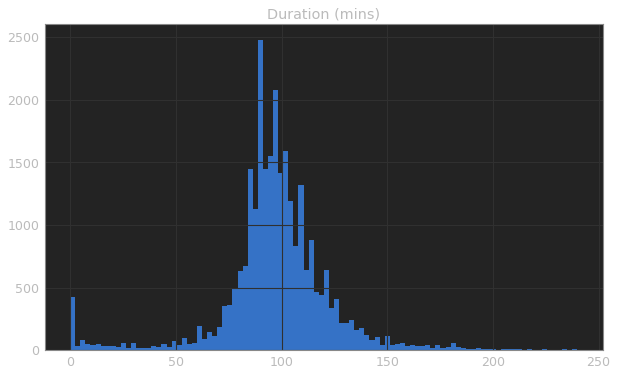

In [152]:
ax = pd.Series([i['runtime'] for i in infos.values()]).fillna(0) \
.sort_values().reset_index()[0][:-120].hist(bins=100, figsize=(10, 6))
ax.set_title("Duration (mins)")

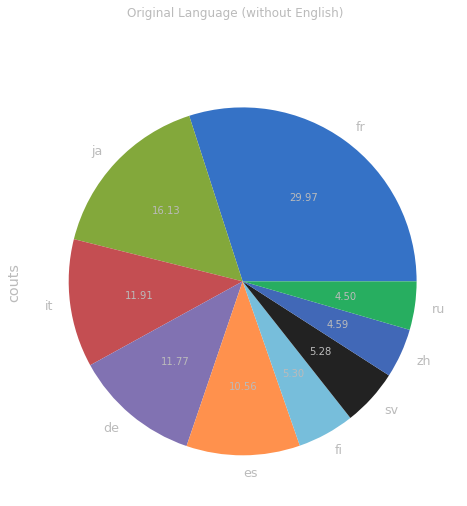

In [165]:
ax = pd.Series([i['original_language'] for i in infos.values()], name='couts')\
.value_counts()[1:10].plot.pie(title="Original Language (without English)",
                              subplots=True, figsize=(8,8),
                              autopct='%.2f'
                             )


Text(0, 0.5, '')

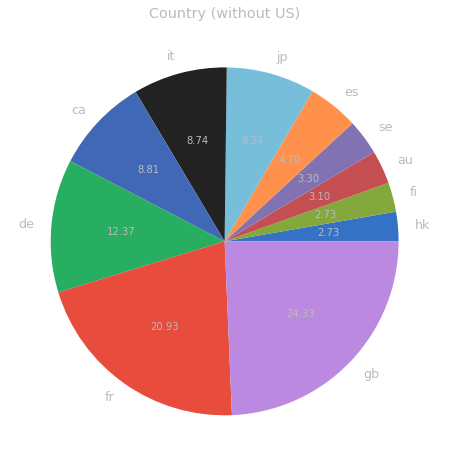

In [157]:
valuesp_c = set()
[p_c.update(set(i['production_countries'])) for i in infos.values()]
v_c = dict([(n, 0) for n in p_c])
for i in [i['production_countries'] for i in infos.values()]:
    for j in i:
        v_c[j] += 1
        

ax = pd.DataFrame({'name': list(v_c.keys()), 'counts': list(v_c.values())})\
.sort_values(by=['counts']).set_index('name')[-12:-1].plot.pie(x='name',
y='counts', figsize=(8,8), autopct='%.2f', title="Country (without US)")

ax.get_legend().remove()
ax.set_ylabel('')

In [155]:
genres_dict = {'Animation': 16,
 'Comedy': 35,
 'Family': 10751,
 'Adventure': 12,
 'Fantasy': 14,
 'Romance': 10749,
 'Drama': 18,
 'Action': 28,
 'Crime': 80,
 'Thriller': 53,
 'Horror': 27,
 'History': 36,
 'Science Fiction': 878,
 'Mystery': 9648,
 'War': 10752,
 'Music': 10402,
 'Documentary': 99,
 'Western': 37,
 'TV Movie': 10770,
 'Sport': 1,
 'Sci-Fi': 878,
 'Musical': 10402,
 'Short': 2,
 'News': 3,
 'Film-Noir': 4}
genres_dict = {v: k for k, v in genres_dict.items()}

Text(0, 0.5, '')

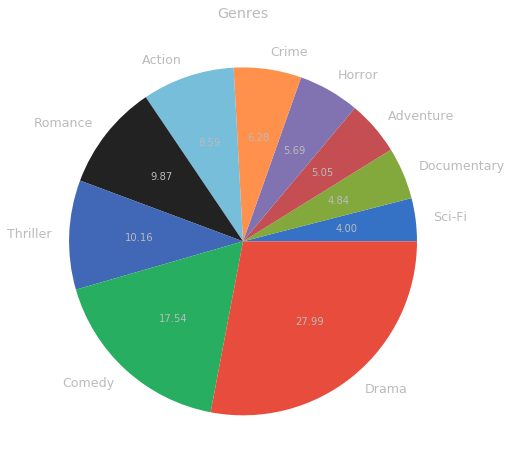

In [159]:

p_c = set()
[p_c.update(set(i['genres'])) for i in infos.values()]
v_c = dict([(n, 0) for n in p_c])
for i in [i['genres'] for i in infos.values()]:
    for j in i:
        v_c[j] += 1
        

l = pd.DataFrame({'name': list(v_c.keys()), 'counts': list(v_c.values())}).sort_values(by=['counts'])
l['name'] = l['name'].apply(genres_dict.get)
l = l.set_index('name')
ax = l[-10:].plot.pie(y='counts', figsize=(8,8), autopct='%.2f', title="Genres")

ax.get_legend().remove()
ax.set_ylabel('')

## Ratings

In [1]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
ratings = pd.read_csv("../../data/ml-20m/ratings.csv")

In [3]:
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [4]:
s = pd.Series(ratings['movieId'].value_counts())

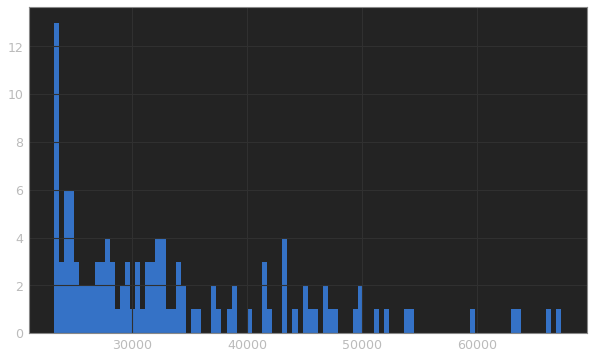

In [5]:
s.sort_values().reset_index(drop=True)[-120:].hist(bins=100, figsize=(10, 6))

In [1]:
len(s.where(lambda s: s <= 50).dropna())

NameError: name 's' is not defined

In [13]:
to_ignore = s.loc[s.where(lambda s: s <= 50).isna()].index.values

In [14]:
ratings = ratings[ratings['movieId'].isin(to_ignore)]

In [76]:
ratings.to_csv('../../data/ml-20m/ratings_lite.csv', index=False)